In [0]:
# Neural Networks - Bank Churn Prediction

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import metrics
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

# from pydrive.drive import  GoogleDrive
from pydrive.auth import GoogleAuth
from google.colab import auth
from oauth2client.client import GoogleCredentials

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
# auth.authenticate_user()
# gauth=GoogleAuth()
# gauth.credentials = GoogleCredentials.get_application_default()
# drive=GoogleDrive(gauth)

In [0]:
####  1. Read the dataset

In [2]:
from google.colab import drive
drive.mount ('/content/drive/')
%cd /content/drive/'My Drive/Colab Notebooks'
file='bank.csv'
# file.GetContentFile('bank.csv')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/
/content/drive/My Drive/Colab Notebooks


In [135]:

dataset=pd.read_csv(file)
dataset.head()


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [136]:
dataset.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [137]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [138]:
print(dataset.Geography.value_counts())


France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64


In [0]:
#### 2. Drop the columns which are unique

In [0]:
data=dataset.drop(['RowNumber','CustomerId','Surname'],axis=1)

In [140]:
data.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [156]:
data = data[(data[['Balance']] != 0).all(axis=1)]
data.shape

(6383, 11)

In [142]:
data.columns
final_df=pd.get_dummies(data,columns=['Geography','Gender'])
final_df

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
1,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,1,0,0,1,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1,1,0
5,645,44,8,113755.78,2,1,0,149756.71,1,0,0,1,0,1
7,376,29,4,115046.74,4,1,0,119346.88,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9991,597,53,4,88381.21,1,1,0,69384.71,1,1,0,0,1,0
9993,644,28,7,155060.41,1,1,0,29179.52,0,1,0,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,1,0,0,0,1
9998,772,42,3,75075.31,2,1,0,92888.52,1,0,1,0,0,1


In [0]:
#### 3. Distinguish feature and target set

In [143]:
final_df.columns
X=final_df.drop(['Exited'],axis=1)
print('feature set:\n',X)
print(X.columns)
Y=data.Exited
print('target set:\n',Y)


feature set:
       CreditScore  Age  Tenure  ...  Geography_Spain  Gender_Female  Gender_Male
1             608   41       1  ...                1              1            0
2             502   42       8  ...                0              1            0
4             850   43       2  ...                1              1            0
5             645   44       8  ...                1              0            1
7             376   29       4  ...                0              1            0
...           ...  ...     ...  ...              ...            ...          ...
9991          597   53       4  ...                0              1            0
9993          644   28       7  ...                0              0            1
9996          516   35      10  ...                0              0            1
9998          772   42       3  ...                0              0            1
9999          792   28       4  ...                0              1            0

[6383 rows x 

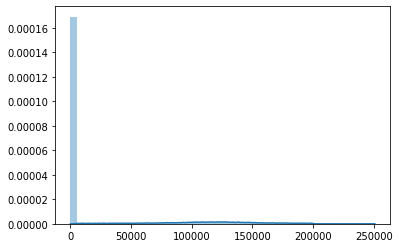

In [144]:
sns.distplot(X,label='Balance')

In [0]:
#### 4. Divide the dataset into train test

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, precision_recall_curve
from sklearn import preprocessing
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.30,random_state=7)


In [0]:
#### 5. Normalize the train and test data

In [0]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
# #define the scaler
scaler=StandardScaler().fit(X_train)
# min_max=MinMaxScaler().fit(X_train)
#scale the train set
x_train=scaler.transform(X_train) #min_max.transform(X_train) #
# scale the test set
x_test=scaler.transform(X_test) # min_max.transform(X_test) #


# print(x_train[0:50])
# print(Y_train.head())
# print(x_test[0:50])
# print(Y_test.head())

In [0]:
# trying out another scaling
# from sklearn.preprocessing import QuantileTransformer
# quantile_transformer = QuantileTransformer(
#  output_distribution='normal', random_state=0)
# x_train = quantile_transformer.fit_transform(X_train)
# x_test=quantile_transformer.transform(X_test)
# print(x_train)

In [147]:
print(np.any(np.isnan(x_train)))
print(np.any(np.isnan(Y_train)))

False
False


In [0]:
#### 6. Initialise and build the model and identify points of improvement and its implementation

In [206]:
from tensorflow.keras import optimizers
from keras.regularizers import l2
#initialise the constructor
model=Sequential()
# add the first layer
model.add(Dense(60,input_shape=(13,),activation='relu',kernel_initializer='uniform'))#,kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))
# add hidden layer
model.add(Dense(32,activation='relu'))#,kernel_initializer='normal'))
# model.add(Dense(16,activation='relu'))#,kernel_initializer='normal'))
# model.add(Dense(8,activation='relu'))#,kernel_initializer='normal'))
# model.add(Dense(2,activation='relu',kernel_initializer='uniform'))
# add output layer
model.add(Dense(1,activation='sigmoid')) # binary classification 0 or 1 for "Exited" class



lr_schedule = optimizers.schedules.InverseTimeDecay(
  0.00001,
  decay_steps=10*1000,
  decay_rate=2,
  staircase=False)


adam=optimizers.Adam(learning_rate=0.00001)#, beta_1=0.0, beta_2=0.999, epsilon=1e-07, amsgrad=True)
sgd=optimizers.SGD(learning_rate=0.0001, momentum=0.0, nesterov=True, name='SGD')

model.compile(loss="binary_crossentropy",optimizer='adam',metrics=['accuracy'])
model.fit(x_train,Y_train,epochs=100,batch_size=10,verbose=1)

Epoch 1/100
447/447 [==============================] - 1s 1ms/step - loss: 0.4839 - accuracy: 0.7874
Epoch 2/100
447/447 [==============================] - 1s 1ms/step - loss: 0.4208 - accuracy: 0.8290
Epoch 3/100
447/447 [==============================] - 1s 1ms/step - loss: 0.4039 - accuracy: 0.8328
Epoch 4/100
447/447 [==============================] - 1s 1ms/step - loss: 0.3955 - accuracy: 0.8350
Epoch 5/100
447/447 [==============================] - 1s 1ms/step - loss: 0.3905 - accuracy: 0.8391
Epoch 6/100
447/447 [==============================] - 1s 1ms/step - loss: 0.3839 - accuracy: 0.8433
Epoch 7/100
447/447 [==============================] - 1s 1ms/step - loss: 0.3817 - accuracy: 0.8413
Epoch 8/100
447/447 [==============================] - 1s 1ms/step - loss: 0.3804 - accuracy: 0.8433
Epoch 9/100
447/447 [==============================] - 1s 1ms/step - loss: 0.3757 - accuracy: 0.8447
Epoch 10/100
447/447 [==============================] - 1s 1ms/step - loss: 0.3724 - accura

In [0]:
## areas of improvement

initially using softmax the loss get changed to nan after certain iterations. Tried with lot of options from scaling, and differnt hyperparamater tuning without any success.Accuracy in that instance was 79%
Then I reduced the layers and used sigmoid function inside "ADAM" optimizer and got a loss value as well as good accuracy of 92%.




In [0]:
#### 7. Predict the results using a threshold of 0.5

In [207]:
y_predict=model.predict(x_test) #np.argmax(model.predict(x_test, batch_size=200, verbose=0),axis=1)
print('predict:',y_predict)
print('Y test:',Y_test)
print('shape of predicted:',y_predict.shape)
y_pred_reshaped=y_predict.reshape(1915)
print('reshaped:',y_predict.reshape(1915)) # requires reshape
print(Y_test.values)
# put the actual and predicted on to a dataframe
y_pred_df = pd.DataFrame( { 'actual': Y_test.values,
                               "predicted_prob":y_pred_reshaped } )
y_pred_df.to_csv('predicted.csv')
y_pred_df.head()

predict: [[0.58296883]
 [0.69206727]
 [0.1801402 ]
 ...
 [0.00907443]
 [0.01408641]
 [0.00933416]]
Y test: 6850    0
6250    0
2597    0
6437    0
3841    1
       ..
7954    0
7116    1
9156    1
5091    0
2959    0
Name: Exited, Length: 1915, dtype: int64
shape of predicted: (1915, 1)
reshaped: [0.58296883 0.69206727 0.1801402  ... 0.00907443 0.01408641 0.00933416]
[0 0 0 ... 1 0 0]


,actual,predicted_prob
0,0,0.582969
1,0,0.692067
2,0,0.180140
3,0,0.387023
4,1,1.000000


In [208]:
print(y_pred_df.shape)
# find those equal to or above 0.5 threshold
y_pred_df['predicted_threshold_0.5'] = y_pred_df.predicted_prob.map( lambda x: 1 if x >= 0.5 else 0)
y_pred_df[200:250]

(1915, 2)


,actual,predicted_prob,predicted_threshold_0.5
200,1,0.908644,1
201,0,0.061665,0
202,1,0.025823,0
203,0,0.921145,1
204,0,0.685911,1
205,0,0.009956,0
206,0,0.068959,0
207,0,0.256912,0
208,1,0.004689,0
209,0,0.559029,1


In [0]:
#### 8. Predict the accuracy score and confusion matrix

In [209]:
loss,acc=model.evaluate(x_test,Y_test,verbose=2)
print('accuracy: %.3f'% acc)
print('loss:%.3f'%loss)

60/60 - 0s - loss: 0.5917 - accuracy: 0.7948
accuracy: 0.795
loss:0.592


In [210]:
print('Recall_score: ' + str(recall_score(y_pred_df['actual'], y_pred_df['predicted_threshold_0.5'])))
print('Precision_score: ' + str(precision_score(y_pred_df['actual'], y_pred_df['predicted_threshold_0.5'])))

Recall_score: 0.53125
Precision_score: 0.6028368794326241


In [211]:
# y_pred=[]
# for val in y_predict:
#   y_pred.append(np.argmax(val))
cm=metrics.confusion_matrix(y_pred_df['actual'],y_pred_df['predicted_threshold_0.5'])
print(cm)

[[1267  168]
 [ 225  255]]


In [0]:
def draw_cm( actual, predicted ):
    cm = metrics.confusion_matrix( actual, predicted, [1,0] )
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels = ["Exited", "Not Exited"] , yticklabels = ["Exited", "Not Exited"] )
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

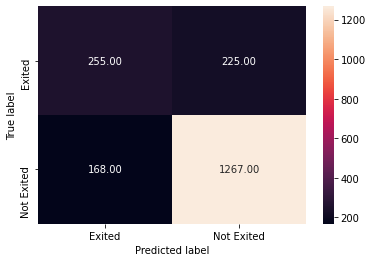

In [213]:
draw_cm(y_pred_df['actual'],y_pred_df['predicted_threshold_0.5'])